In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# File name: declination_dependent_noise1-2.py
"""
Created on Tue Jun 26 12:38:35 2018

@author: Neo(liuniu@smail.nju.edu.cn)

Estimate the declination dependent noise (-30 deg ~ +30 deg), using the method of DSM.

"""

import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, deg2rad, sqrt
from scipy.optimize import curve_fit
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# My module
from error_inflation_progs import (error_inflation, wrms_calc, sf_nf_calc, pos_offset_wrms_soubinned)

In [2]:
# Load data
datfile = ("../data/odd-even.cat_diff")
soulist = np.genfromtxt(datfile, usecols=(0,), dtype=str)
RA, Dec, dRAc, dDec, dRAc_err, dDec_err = np.genfromtxt(
    datfile, usecols=range(1, 7), unpack=True)
num_ses_mean, num_obs_mean = np.genfromtxt(
    datfile, dtype=int, usecols=range(7, 9), unpack=True)

In [3]:
# Calculate the offset and normalized seperation
rho = sqrt(dRAc**2 + dDec**2)
rho_err = sqrt(dRAc_err**2 + dDec_err**2)

# scale the position offset by their uncertainty
nor_dRAc = dRAc / dRAc_err
nor_dDec = dDec / dDec_err
nor_rho = sqrt(nor_dRAc**2 + nor_dDec**2)

In [4]:
# use a criteria "offset <= 1 mas" and "normalized seperation < 5" to remove outliers
con = (rho <= 1.) & (rho/rho_err <= 5.)

Decn = Dec[con]
dRAcn = dRAc[con]
dDecn = dDec[con]
dRAc_errn = dRAc_err[con]
dDec_errn = dDec_err[con]
num_ses_meann = num_ses_mean[con]

print("The decimation solutions have %d common sources, %d remain after removing outliers." 
      % (dRAc.size, dRAcn.size))

The decimation solutions have 2704 common sources, 1805 remain after removing outliers.


In [5]:
# For sources in [-30, -15)
con1 = (Decn >= -30) & (Decn < -15)

Dec1 = Decn[con1]
dRAc1 = dRAcn[con1]
dDec1 = dDecn[con1]
dRAc_err1 = dRAc_errn[con1]
dDec_err1 = dDec_errn[con1]
num_ses_mean1 = num_ses_meann[con1]

# Caculate scale factors and noise floor
sf_ra1, nf_ra1 = sf_nf_calc(dRAc1, dRAc_err1)
sf_dec1, nf_dec1 = sf_nf_calc(dDec1, dDec_err1)

print("For %d sources in [-30, -15) deg:\n" % Dec1.size,
      "             scale factors of RA and Dec. are %.3f and %.3f.\n" % (sf_ra1, sf_dec1),
      "             noise floors  of RA and Dec. are %.3f and %.3f mas." % (nf_ra1, nf_dec1))

For 255 sources in [-30, -15) deg:
              scale factors of RA and Dec. are 1.455 and 1.136.
              noise floors  of RA and Dec. are 0.039 and 0.040 mas.


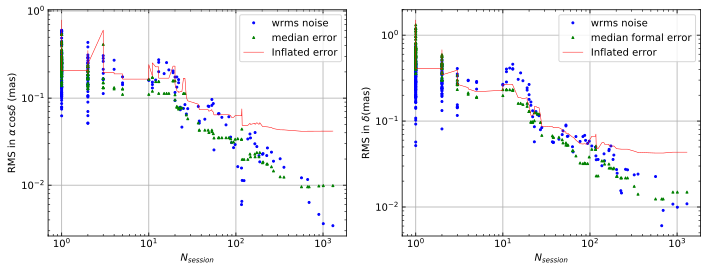

In [6]:
# Plot for sources in [-30, -15) deg
# Sort the data according to the number of sessions
ind1 = np.argsort(num_ses_mean1)
num_ses_sort1 = np.take(num_ses_mean1, ind1)
dRAc_sort1 = np.take(dRAc1, ind1)
dDec_sort1 = np.take(dDec1, ind1)
dRAc_err_sort1 = np.take(dRAc_err1, ind1)
dDec_err_sort1 = np.take(dDec_err1, ind1)

# Calculate the positional offset scatter
dRAc_wrms1, dRAc_err_med1, ses_min_RA1 = pos_offset_wrms_soubinned(
    num_ses_sort1, dRAc_sort1, dRAc_err_sort1, interv_size=5)
dDec_wrms1, dDec_err_med1, ses_min_Dec1 = pos_offset_wrms_soubinned(
    num_ses_sort1, dDec_sort1, dDec_err_sort1, interv_size=5)

# Inflated error
dRAc_err_inf1 = error_inflation(dRAc_err_med1, sf_ra1, nf_ra1)
dDec_err_inf1 = error_inflation(dDec_err_med1, sf_dec1, nf_dec1)

# wrms difference VS median formal uncertainty (Log-plot)
fig, (ax0, ax1) = plt.subplots(figsize=(10, 4), ncols=2, sharex=True)

ax0.plot(ses_min_RA1, dRAc_wrms1, "bo", markersize=2, label="wrms noise")
ax0.plot(ses_min_RA1, dRAc_err_med1, "g^", markersize=2, label="median error")
ax0.plot(ses_min_RA1, dRAc_err_inf1, "r", lw=0.5, label="Inflated error")
ax1.plot(ses_min_Dec1, dDec_wrms1, "bo", markersize=2, label="wrms noise")
ax1.plot(ses_min_Dec1, dDec_err_med1, "g^",
         markersize=2, label="median formal error")
ax1.plot(ses_min_Dec1, dDec_err_inf1, "r", lw=0.5, label="Inflated error")

ax0.set_xscale("log")
ax0.set_xlabel("$N_{session}$")
ax0.set_yscale("log")
ax0.set_ylabel("RMS in $\\alpha\\,\\cos\\delta$ (mas)")
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
# ax0.set_xlim([1, 30])
ax0.grid(True)
ax0.legend()

ax1.set_xscale("log")
ax1.set_xlabel("$N_{session}$")
ax1.set_yscale("log")
ax1.set_ylabel("RMS in $\\delta$(mas)")
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.grid(True)
ax1.legend()

plt.tight_layout()
plt.subplots_adjust(hspace=0.1)

In [7]:
# For sources in [-15, 0)
con1 = (Decn >= -15) & (Decn < 0)

Dec1 = Decn[con1]
dRAc1 = dRAcn[con1]
dDec1 = dDecn[con1]
dRAc_err1 = dRAc_errn[con1]
dDec_err1 = dDec_errn[con1]
num_ses_mean1 = num_ses_meann[con1]

# Caculate scale factors and noise floor
sf_ra1, nf_ra1 = sf_nf_calc(dRAc1, dRAc_err1)
sf_dec1, nf_dec1 = sf_nf_calc(dDec1, dDec_err1)

print("For %d sources in [-15, 0) deg:\n" % Dec1.size,
      "             scale factors of RA and Dec. are %.3f and %.3f.\n" % (sf_ra1, sf_dec1),
      "             noise floors  of RA and Dec. are %.3f and %.3f mas." % (nf_ra1, nf_dec1))

For 213 sources in [-15, 0) deg:
              scale factors of RA and Dec. are 1.501 and 1.275.
              noise floors  of RA and Dec. are 0.030 and 0.034 mas.


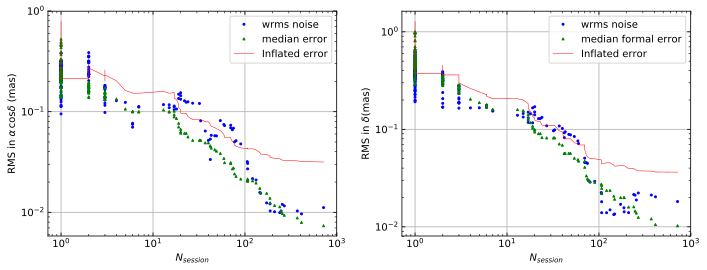

In [8]:
# Plot for sources in [-15, 0) deg
# Sort the data according to the number of sessions
ind1 = np.argsort(num_ses_mean1)
num_ses_sort1 = np.take(num_ses_mean1, ind1)
dRAc_sort1 = np.take(dRAc1, ind1)
dDec_sort1 = np.take(dDec1, ind1)
dRAc_err_sort1 = np.take(dRAc_err1, ind1)
dDec_err_sort1 = np.take(dDec_err1, ind1)

# Calculate the positional offset scatter
dRAc_wrms1, dRAc_err_med1, ses_min_RA1 = pos_offset_wrms_soubinned(
    num_ses_sort1, dRAc_sort1, dRAc_err_sort1, interv_size=10)
dDec_wrms1, dDec_err_med1, ses_min_Dec1 = pos_offset_wrms_soubinned(
    num_ses_sort1, dDec_sort1, dDec_err_sort1, interv_size=10)

# Inflated error
dRAc_err_inf1 = error_inflation(dRAc_err_med1, sf_ra1, nf_ra1)
dDec_err_inf1 = error_inflation(dDec_err_med1, sf_dec1, nf_dec1)

# wrms difference VS median formal uncertainty (Log-plot)
fig, (ax0, ax1) = plt.subplots(figsize=(10, 4), ncols=2, sharex=True)

ax0.plot(ses_min_RA1, dRAc_wrms1, "bo", markersize=2, label="wrms noise")
ax0.plot(ses_min_RA1, dRAc_err_med1, "g^", markersize=2, label="median error")
ax0.plot(ses_min_RA1, dRAc_err_inf1, "r", lw=0.5, label="Inflated error")
ax1.plot(ses_min_Dec1, dDec_wrms1, "bo", markersize=2, label="wrms noise")
ax1.plot(ses_min_Dec1, dDec_err_med1, "g^",
         markersize=2, label="median formal error")
ax1.plot(ses_min_Dec1, dDec_err_inf1, "r", lw=0.5, label="Inflated error")

ax0.set_xscale("log")
ax0.set_xlabel("$N_{session}$")
ax0.set_yscale("log")
ax0.set_ylabel("RMS in $\\alpha\\,\\cos\\delta$ (mas)")
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
# ax0.set_xlim([1, 40])
ax0.grid(True)
ax0.legend()

ax1.set_xscale("log")
ax1.set_xlabel("$N_{session}$")
ax1.set_yscale("log")
ax1.set_ylabel("RMS in $\\delta$(mas)")
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.grid(True)
ax1.legend()

plt.tight_layout()
plt.subplots_adjust(hspace=0.1)

In [9]:
# For sources in [0, +15)
con1 = (Decn >= 0) & (Decn < 15)

Dec1 = Decn[con1]
dRAc1 = dRAcn[con1]
dDec1 = dDecn[con1]
dRAc_err1 = dRAc_errn[con1]
dDec_err1 = dDec_errn[con1]
num_ses_mean1 = num_ses_meann[con1]

# Caculate scale factors and noise floor
sf_ra1, nf_ra1 = sf_nf_calc(dRAc1, dRAc_err1)
sf_dec1, nf_dec1 = sf_nf_calc(dDec1, dDec_err1)

print("For %d sources in [0, +15) deg:\n" % Dec1.size,
      "             scale factors of RA and Dec. are %.3f and %.3f.\n" % (sf_ra1, sf_dec1),
      "             noise floors  of RA and Dec. are %.3f and %.3f mas." % (nf_ra1, nf_dec1))

For 302 sources in [0, +15) deg:
              scale factors of RA and Dec. are 1.501 and 1.268.
              noise floors  of RA and Dec. are 0.032 and 0.038 mas.


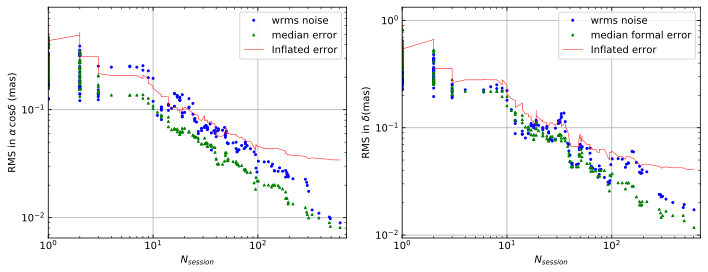

In [10]:
# Plot for sources in [0, +15) deg
# Sort the data according to the number of sessions
ind1 = np.argsort(num_ses_mean1)
num_ses_sort1 = np.take(num_ses_mean1, ind1)
dRAc_sort1 = np.take(dRAc1, ind1)
dDec_sort1 = np.take(dDec1, ind1)
dRAc_err_sort1 = np.take(dRAc_err1, ind1)
dDec_err_sort1 = np.take(dDec_err1, ind1)

# Calculate the positional offset scatter
dRAc_wrms1, dRAc_err_med1, ses_min_RA1 = pos_offset_wrms_soubinned(
    num_ses_sort1, dRAc_sort1, dRAc_err_sort1, interv_size=10)
dDec_wrms1, dDec_err_med1, ses_min_Dec1 = pos_offset_wrms_soubinned(
    num_ses_sort1, dDec_sort1, dDec_err_sort1, interv_size=10)

# Inflated error
dRAc_err_inf1 = error_inflation(dRAc_err_med1, sf_ra1, nf_ra1)
dDec_err_inf1 = error_inflation(dDec_err_med1, sf_dec1, nf_dec1)

# wrms difference VS median formal uncertainty (Log-plot)
fig, (ax0, ax1) = plt.subplots(figsize=(10, 4), ncols=2, sharex=True)

ax0.plot(ses_min_RA1, dRAc_wrms1, "bo", markersize=2, label="wrms noise")
ax0.plot(ses_min_RA1, dRAc_err_med1, "g^", markersize=2, label="median error")
ax0.plot(ses_min_RA1, dRAc_err_inf1, "r", lw=0.5, label="Inflated error")
ax1.plot(ses_min_Dec1, dDec_wrms1, "bo", markersize=2, label="wrms noise")
ax1.plot(ses_min_Dec1, dDec_err_med1, "g^",
         markersize=2, label="median formal error")
ax1.plot(ses_min_Dec1, dDec_err_inf1, "r", lw=0.5, label="Inflated error")

ax0.set_xscale("log")
ax0.set_xlabel("$N_{session}$")
ax0.set_yscale("log")
ax0.set_ylabel("RMS in $\\alpha\\,\\cos\\delta$ (mas)")
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.set_xlim([1, 700])
ax0.grid(True)
ax0.legend()

ax1.set_xscale("log")
ax1.set_xlabel("$N_{session}$")
ax1.set_yscale("log")
ax1.set_ylabel("RMS in $\\delta$(mas)")
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.grid(True)
ax1.legend()

plt.tight_layout()
plt.subplots_adjust(hspace=0.1)

In [11]:
# For sources in [+15, +30)
con1 = (Decn >= 15) & (Decn < 30)

Dec1 = Decn[con1]
dRAc1 = dRAcn[con1]
dDec1 = dDecn[con1]
dRAc_err1 = dRAc_errn[con1]
dDec_err1 = dDec_errn[con1]
num_ses_mean1 = num_ses_meann[con1]

# Caculate scale factors and noise floor
sf_ra1, nf_ra1 = sf_nf_calc(dRAc1, dRAc_err1)
sf_dec1, nf_dec1 = sf_nf_calc(dDec1, dDec_err1)

print("For %d sources in [+15, +30) deg:\n" % Dec1.size,
      "             scale factors of RA and Dec. are %.3f and %.3f.\n" % (sf_ra1, sf_dec1),
      "             noise floors  of RA and Dec. are %.3f and %.3f mas." % (nf_ra1, nf_dec1))

For 276 sources in [+15, +30) deg:
              scale factors of RA and Dec. are 1.433 and 1.119.
              noise floors  of RA and Dec. are 0.031 and 0.031 mas.


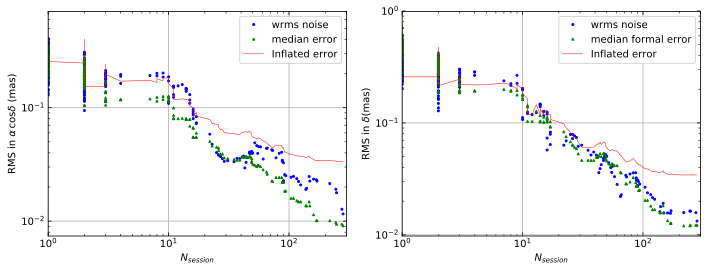

In [12]:
# Plot for sources in [+15, +30) deg
# Sort the data according to the number of sessions
ind1 = np.argsort(num_ses_mean1)
num_ses_sort1 = np.take(num_ses_mean1, ind1)
dRAc_sort1 = np.take(dRAc1, ind1)
dDec_sort1 = np.take(dDec1, ind1)
dRAc_err_sort1 = np.take(dRAc_err1, ind1)
dDec_err_sort1 = np.take(dDec_err1, ind1)

# Calculate the positional offset scatter
dRAc_wrms1, dRAc_err_med1, ses_min_RA1 = pos_offset_wrms_soubinned(
    num_ses_sort1, dRAc_sort1, dRAc_err_sort1, interv_size=10)
dDec_wrms1, dDec_err_med1, ses_min_Dec1 = pos_offset_wrms_soubinned(
    num_ses_sort1, dDec_sort1, dDec_err_sort1, interv_size=10)

# Inflated error
dRAc_err_inf1 = error_inflation(dRAc_err_med1, sf_ra1, nf_ra1)
dDec_err_inf1 = error_inflation(dDec_err_med1, sf_dec1, nf_dec1)

# wrms difference VS median formal uncertainty (Log-plot)
fig, (ax0, ax1) = plt.subplots(figsize=(10, 4), ncols=2, sharex=True)

ax0.plot(ses_min_RA1, dRAc_wrms1, "bo", markersize=2, label="wrms noise")
ax0.plot(ses_min_RA1, dRAc_err_med1, "g^", markersize=2, label="median error")
ax0.plot(ses_min_RA1, dRAc_err_inf1, "r", lw=0.5, label="Inflated error")
ax1.plot(ses_min_Dec1, dDec_wrms1, "bo", markersize=2, label="wrms noise")
ax1.plot(ses_min_Dec1, dDec_err_med1, "g^",
         markersize=2, label="median formal error")
ax1.plot(ses_min_Dec1, dDec_err_inf1, "r", lw=0.5, label="Inflated error")

ax0.set_xscale("log")
ax0.set_xlabel("$N_{session}$")
ax0.set_yscale("log")
ax0.set_ylabel("RMS in $\\alpha\\,\\cos\\delta$ (mas)")
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.set_xlim([1, 300])
ax0.grid(True)
ax0.legend()

ax1.set_xscale("log")
ax1.set_xlabel("$N_{session}$")
ax1.set_yscale("log")
ax1.set_ylabel("RMS in $\\delta$(mas)")
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.grid(True)
ax1.legend()

plt.tight_layout()
plt.subplots_adjust(hspace=0.1)